*This notebook made by:* **Farnaz Baksh** & **Matevz Zorec**

During our **Introduction to Data Science course** in Autumn 2021 <br>
Course Code: *LTAT.02.002*

Project title:

>**Team B1: UT Student Profiling based on Moodle Log Data**

*18. 11. 2021  -  14.12.2021*

**Goal:** to identify common activity patterns of the participants (students) in order to create ‘typical student profiles’

*Typical student profile:* a student who falls into one of the categories of the grading scheme (A, B, C, D, E, F) in the gradebook data.

## Getting started with the data

In [1]:
#Import Packages
import pandas as pd
import numpy as np

In [2]:
#Read data from the xlsx files
grades = pd.read_excel("02-05 Hinded.xlsx")
#grades

In [3]:
#Overall memory consumption of the data
grades.memory_usage(deep=True).sum()

1563166

In [4]:
#Check data

print(grades.columns)
grades.shape
#grades.head(5)
#data.iloc[577]
#data.describe()

#data[(data["Gender"] == 'M') & (data["Weight"] < 0.75)].describe()

Index(['Eesnimi', 'Perenimi', 'ID-number', 'Meiliaadress',
       'Test:1. nädala test (Punktid)', 'Test:2. nädala test (Punktid)',
       'Test:3. nädala test (Punktid)', 'Test:4. nädala test (Punktid)',
       'Test:5. nädala test (Punktid)', 'Test:6. nädala test (Punktid)',
       ...
       'VPL harjutus:Pokkerikäte tuvastamise automaatkontroll (Punktid)',
       'Test:Kontrolltöö harjutustest (Punktid)',
       'Test:Kontrolltöö harjutustest (Punktid).1',
       'Test:Näidiseksami arvestuslik osa (Punktid)',
       'Test:Näidiseksami punktilise osa 1. ülesanne (Punktid)',
       'Ülesanne:Näidiseksami logide ja video esitamine (Punktid)',
       'Harjutamine kokku (Punktid)', 'Kogutulemus (Punktid)',
       'Hinne (Punktid)', 'Sellest kursusest viimati alla laaditud'],
      dtype='object', length=111)


(342, 111)

In [5]:
#extract first names, last name, ID-number, e-mail columns and save them to a csv file: "Student_NAME_ID_link.csv"
header = ["Eesnimi", "Perenimi", "ID-number", "Meiliaadress"]
grades.to_csv('Student_NAME_ID_link.csv', columns = header)

In [6]:
#drop the same columns except ID-number from the gradebook dataset
del grades['Eesnimi']
del grades['Perenimi']
del grades['Meiliaadress']
grades

,ID-number,Test:1. nädala test (Punktid),Test:2. nädala test (Punktid),Test:3. nädala test (Punktid),Test:4. nädala test (Punktid),Test:5. nädala test (Punktid),Test:6. nädala test (Punktid),Test:7. nädala test (Punktid),Test:8. nädala test (Punktid),Test:9. nädala test (Punktid),...,VPL harjutus:Pokkerikäte tuvastamise automaatkontroll (Punktid),Test:Kontrolltöö harjutustest (Punktid),Test:Kontrolltöö harjutustest (Punktid).1,Test:Näidiseksami arvestuslik osa (Punktid),Test:Näidiseksami punktilise osa 1. ülesanne (Punktid),Ülesanne:Näidiseksami logide ja video esitamine (Punktid),Harjutamine kokku (Punktid),Kogutulemus (Punktid),Hinne (Punktid),Sellest kursusest viimati alla laaditud
0,50105090226,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,9,4,9.6,NaN,-,109.40,100.00,1612512348
1,50106202741,0.48,0.46,0.5,0.45,0.45,0.45,0.5,0.5,0.43,...,-,8,6.5,-,-,NaN,-,97.60,97.60,1612512348
2,49711072726,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,8.75,4,9.6,NaN,-,95.68,95.68,1612512348
3,60109126818,0.5,0.45,-,0.5,0.5,0.46,0.5,0.5,0.15,...,-,8,6.5,3,10,NaN,-,73.13,73.13,1612512348
4,38603270069,0.48,0.38,0.35,0.23,0.31,0.36,0.5,0.5,0.24,...,-,6,6.3,2.1,-,NaN,-,42.23,0.10,1612512348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,50003092774,0.5,0.5,0.46,0.48,0.41,0.39,0.45,0.39,0.44,...,-,-,-,4,-,NaN,-,98.81,98.81,1612512355
338,50011131419,0.46,0.5,0.5,0.48,0.5,0.5,0.5,0.5,0.5,...,-,8,-,4,8.7,NaN,-,104.90,100.00,1612512355
339,50102182738,-,0.49,0.48,-,-,-,-,-,-,...,-,-,-,3,-,NaN,-,81.07,81.07,1612512355
340,60105140013,-,0.5,0.5,0.5,0.35,0.49,0.44,0.44,0.28,...,-,8,8.75,3.5,6.1,NaN,-,85.59,85.59,1612512355


## Information from description.txt

Each column contains the grades of one activity. Activity names are in the header row, "(Punktid)" is added by Moodle and means that the activity gives points. 

**Not all activities were compulsory.**

The column names that end with "kokku" are category totals, all columns preceding
it until the previous "kokku" belong to that category.

The column "Kogutulemus (Punktid)" is the student's final result on a scale of 0-110. The column "Hinne (Punktid)" is the result according to which the grade is determined. The grading scale was A [90-110], B [80-90), C [70-80), D [60-70), E [50-60), F [0-50). 

A description of the
grading (in Estonian) is at https://courses.cs.ut.ee/2020/programmeerimine/fall.

In [7]:
list(grades.columns)

['ID-number',
 'Test:1. nädala test (Punktid)',
 'Test:2. nädala test (Punktid)',
 'Test:3. nädala test (Punktid)',
 'Test:4. nädala test (Punktid)',
 'Test:5. nädala test (Punktid)',
 'Test:6. nädala test (Punktid)',
 'Test:7. nädala test (Punktid)',
 'Test:8. nädala test (Punktid)',
 'Test:9. nädala test (Punktid)',
 'Test:10. nädala test (Punktid)',
 'Test:11. nädala test (Punktid)',
 'Test:12. nädala test (Punktid)',
 'Test:13. nädala test (Punktid)',
 'Test:14. nädala test (Punktid)',
 'Test:15. nädala test (Punktid)',
 'Test:16. nädala test (Punktid)',
 'Videoloengud kokku (Punktid)',
 'VPL harjutus:1. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid)',
 'VPL harjutus:2. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).1',
 'VPL harjutus:3. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).2',
 'VPL harjutus:4. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).3',
 'VPL harjut

In [8]:
### Translate file from Estonian to English
# import the library
from google_trans_new import google_translator
# create a translator object
translator = google_translator()

#print(google_trans_new.LANGUAGES)

In [9]:
# use translate method to translate a string - by default, the destination language is english
translated1 = translator.translate('(Punktid)',lang_tgt='en')
translated2 = translator.translate('Test:2. nädala test (Punktid)',lang_tgt='en')
translated3 = translator.translate('kokku',lang_tgt='en')
translated4 = translator.translate('Kogutulemus (Punktid)',lang_tgt='en')
translated5 = translator.translate('Hinne (Punktid)',lang_tgt='en')

# the translate method returns an object
print("Checking if google translate api works:","\n","\n", "(Punktid) =",translated1,"\n", "Test:2. nädala test (Punktid) =", translated2,"\n","kokku =", translated3,"\n","Kogutulemus (Punktid) =", translated4,"\n","Hinne (Punktid) =", translated5)

Checking if google translate api works: 
 
 (Punktid) = (Points)  
 Test:2. nädala test (Punktid) = Test: 2. Weekly test (points)  
 kokku = together  
 Kogutulemus (Punktid) = Total result (points)  
 Hinne (Punktid) = Grade (points) 


In [10]:
grades_en = grades.copy()

# translate columns' name using rename function
grades_en.rename(columns=lambda x: translator.translate(x, lang_src='et', lang_tgt='en'), inplace=True)

# translated column names
grades_en.columns

Index(['ID number ', 'Test: 1. Weekly test (points) ',
       'Test: 2. Weekly test (points) ', 'Test: 3. Weekly test (points) ',
       'Test: 4. Weekly test (points) ', 'Test: 5. Weekly test (points) ',
       'Test: 6. Weekly test (points) ', 'Test: 7. Weekly test (points) ',
       'Test: 8. Weekly test (points) ', 'Test: 9. Weekly test (points) ',
       ...
       'VPL Exercise: Automatic Control (Points) for Poker Detection ',
       'Test: Control Work Exercises (Points) ',
       'Test: Control work exercises (points) .1 ',
       'Test: Estimated parts of the sample exam (points) ',
       'Test: Sample examination section 1 task (points) ',
       'Task: Presentation of sample exam logs and video (points) ',
       'Practicing together (points) ', 'Total result (points) ',
       'Grade (points) ', 'Last downloaded from this course '],
      dtype='object', length=108)

In [12]:
grades_en.memory_usage(deep=True).sum()
grades_en

,ID number,Test: 1. Weekly test (points),Test: 2. Weekly test (points),Test: 3. Weekly test (points),Test: 4. Weekly test (points),Test: 5. Weekly test (points),Test: 6. Weekly test (points),Test: 7. Weekly test (points),Test: 8. Weekly test (points),Test: 9. Weekly test (points),...,VPL Exercise: Automatic Control (Points) for Poker Detection,Test: Control Work Exercises (Points),Test: Control work exercises (points) .1,Test: Estimated parts of the sample exam (points),Test: Sample examination section 1 task (points),Task: Presentation of sample exam logs and video (points),Practicing together (points),Total result (points),Grade (points),Last downloaded from this course
0,50105090226,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,9,4,9.6,NaN,-,109.40,100.00,1612512348
1,50106202741,0.48,0.46,0.5,0.45,0.45,0.45,0.5,0.5,0.43,...,-,8,6.5,-,-,NaN,-,97.60,97.60,1612512348
2,49711072726,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,8.75,4,9.6,NaN,-,95.68,95.68,1612512348
3,60109126818,0.5,0.45,-,0.5,0.5,0.46,0.5,0.5,0.15,...,-,8,6.5,3,10,NaN,-,73.13,73.13,1612512348
4,38603270069,0.48,0.38,0.35,0.23,0.31,0.36,0.5,0.5,0.24,...,-,6,6.3,2.1,-,NaN,-,42.23,0.10,1612512348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,50003092774,0.5,0.5,0.46,0.48,0.41,0.39,0.45,0.39,0.44,...,-,-,-,4,-,NaN,-,98.81,98.81,1612512355
338,50011131419,0.46,0.5,0.5,0.48,0.5,0.5,0.5,0.5,0.5,...,-,8,-,4,8.7,NaN,-,104.90,100.00,1612512355
339,50102182738,-,0.49,0.48,-,-,-,-,-,-,...,-,-,-,3,-,NaN,-,81.07,81.07,1612512355
340,60105140013,-,0.5,0.5,0.5,0.35,0.49,0.44,0.44,0.28,...,-,8,8.75,3.5,6.1,NaN,-,85.59,85.59,1612512355


In [13]:
list(grades_en.columns)

['ID number ',
 'Test: 1. Weekly test (points) ',
 'Test: 2. Weekly test (points) ',
 'Test: 3. Weekly test (points) ',
 'Test: 4. Weekly test (points) ',
 'Test: 5. Weekly test (points) ',
 'Test: 6. Weekly test (points) ',
 'Test: 7. Weekly test (points) ',
 'Test: 8. Weekly test (points) ',
 'Test: 9. Weekly test (points) ',
 'Test: 10. Weekly test (points) ',
 'Test: 11. Weekly test (points) ',
 'Test: 12. Weekly test (points) ',
 'Test: 13. Weekly test (points) ',
 'Test: 14. Weekly test (points) ',
 'Test: 15. Weekly test (points) ',
 'Test: 16. Weekly test (points) ',
 'Total video lectures (points) ',
 "VPL Exercise: 1. week's homework (points) ",
 'VPL Exercise: Practice submission (points) ',
 "VPL Exercise: 2. week's homework (points) ",
 'VPL Exercise: Practice submission (points) .1 ',
 "VPL Exercise: 3. week's homework (points) ",
 'VPL Exercise: Practice submission (points) .2 ',
 "VPL Exercise: 4. week's homework (points) ",
 'VPL Exercise: Presentation of Practice (poi

# Some graphical EDA

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set the default style
plt.style.use("ggplot") 

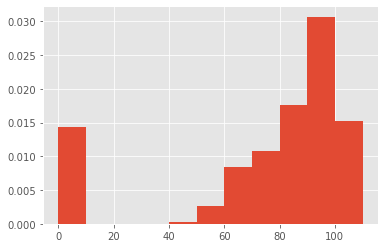

In [15]:
#Estonian Dataset
grades['Hinne (Punktid)'].hist(bins=[i*10 for i in range(12)],density=True)

Well that works!


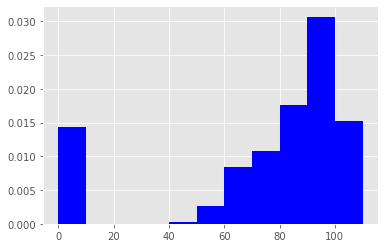

In [16]:
# English Data
grades_en['Grade (points) '].hist(bins=[i*10 for i in range(12)],color= 'blue', density=True)
print("Well that works!")

In [17]:
###Checking for students with zero
grades_en[grades_en['Grade (points) '] == 0].shape

(48, 108)

## The grading scale was A [90-100], B [80-90), C [70-80), D [60-70), E [50-60), F [0-50). 


In [19]:
##Making a copy of gradebook to further explore it
grades_en_cpy = grades_en.copy()

In [20]:
###Assigning grading scale to students (using the Grade points column or 'Hinne (Punktid)')
rows = len(grades_en)
test = np.ones(342)

grades_en_cpy.insert(len(grades_en_cpy.columns), "Grade (letter)", (test))

for row in range(0, rows):
    grade = int(grades_en_cpy['Grade (points) '].loc[row])

    if grade < 50:
        grades_en_cpy['Grade (letter)'].loc[row] = 'F'
    
    elif (grade >= 50) and (grade <= 59):
        grades_en_cpy['Grade (letter)'].loc[row] = 'E'
    
    elif (grade >= 60) and (grade <= 69):
        grades_en_cpy['Grade (letter)'].loc[row] = 'D'
    
    elif (grade >= 70) and (grade <= 79):
        grades_en_cpy['Grade (letter)'].loc[row] = 'C'
    
    elif (grade >= 80) and (grade <= 89):
        grades_en_cpy['Grade (letter)'].loc[row] = 'B'
    
    elif (grade >= 90) and (grade <= 100):
        grades_en_cpy['Grade (letter)'].loc[row] = 'A'

C:\Users\Farnaz Baksh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
#grades_en_cpy
sorted_grades_en_cpy = grades_en_cpy.sort_values(by=['Grade (letter)'], ascending=False)
sorted_grades_en_cpy.head(51)

,ID number,Test: 1. Weekly test (points),Test: 2. Weekly test (points),Test: 3. Weekly test (points),Test: 4. Weekly test (points),Test: 5. Weekly test (points),Test: 6. Weekly test (points),Test: 7. Weekly test (points),Test: 8. Weekly test (points),Test: 9. Weekly test (points),...,Test: Control Work Exercises (Points),Test: Control work exercises (points) .1,Test: Estimated parts of the sample exam (points),Test: Sample examination section 1 task (points),Task: Presentation of sample exam logs and video (points),Practicing together (points),Total result (points),Grade (points),Last downloaded from this course,Grade (letter)
110,50108070325,0.47,0.5,0.5,-,-,-,-,-,-,...,-,-,-,-,NaN,-,95.00,0.00,1612512350,F
322,50012172732,0.47,0.5,-,-,-,-,-,-,-,...,-,-,-,-,NaN,-,95.00,0.00,1612512354,F
207,46410212717,0.48,0.45,0.49,0.38,0.44,0.38,0.45,0.44,0.43,...,-,7.25,-,-,NaN,-,45.25,45.25,1612512352,F
205,50104262730,-,-,-,-,-,-,-,-,-,...,-,-,-,-,NaN,-,1.00,0.00,1612512352,F
204,39505102736,-,-,-,-,0.05,-,-,-,-,...,-,-,-,-,NaN,-,5.35,0.00,1612512352,F
31,50009230834,0.5,0.43,0,0.4,0.3,-,-,-,-,...,-,-,-,-,NaN,-,5.13,0.00,1612512349,F
279,50108202740,0.5,0.39,0.28,0.3,0.29,0.35,-,-,-,...,4.21,-,-,-,NaN,-,26.84,0.00,1612512354,F
324,60008132717,0.46,0.49,0.36,0.26,0.33,0.28,-,-,0,...,7,7.25,-,-,NaN,-,27.04,0.00,1612512354,F
198,50003045719,-,0.36,0.36,0.3,0.34,0.29,0.33,-,-,...,5,-,-,-,NaN,-,18.98,0.00,1612512352,F
36,50006212789,0.43,0.3,0.18,-,0.33,0.43,0.34,0.1,-,...,7,9,-,-,NaN,-,37.36,0.00,1612512349,F


**Total results (points) vs Grade (points) column has some inconsistency.**

Not everyone who score results points was assigned a grade point. We think this is because:
1. some students started the course and then drop out
2. some did successfully at the pre-exam in the 2nd week and saw that they did not need to continue the course given that they felt secure in their programming skills
3. All lower limits was not met thus the student did not receive a positive grade on the course
4. other reasons unknown to us

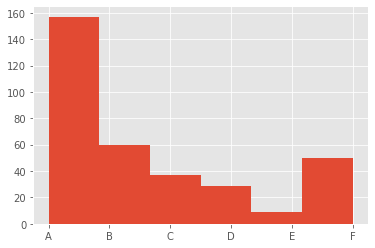

In [23]:
grades_en_cpy['Grade (letter)'].sort_values().hist(bins=6, density=False)

In [24]:
grades_en_cpy['Grade (letter)']

0      A
1      A
2      A
3      C
4      F
      ..
337    A
338    A
339    B
340    B
341    C
Name: Grade (letter), Length: 342, dtype: object

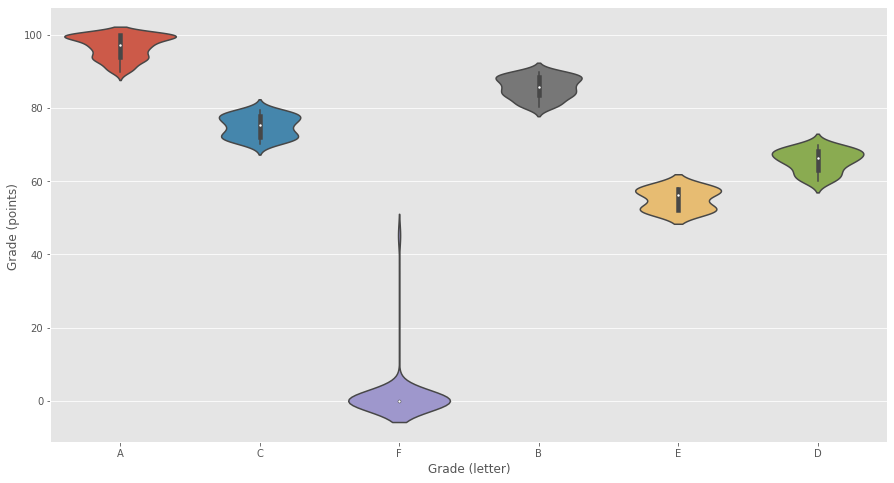

In [25]:
import pandas as pd
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.violinplot(x="Grade (letter)", y="Grade (points) ", data=grades_en_cpy)

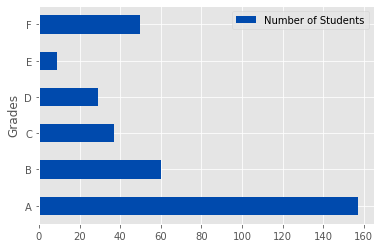

In [27]:
df = pd.DataFrame({'Grades': ['A', 'B', 'C', 'D', 'E', 'F'], 'Number of Students': [157, 60, 37, 29, 9, 50]})
ax = df.plot.barh(x='Grades', y='Number of Students', color= '#004aad')

#plt.savefig("employee_growth_tp.png", transparent=True, showgrid=False)

In [28]:
count_A = grades_en_cpy['Grade (letter)'].value_counts()['A']
count_B = grades_en_cpy['Grade (letter)'].value_counts()['B']
count_C = grades_en_cpy['Grade (letter)'].value_counts()['C']
count_D = grades_en_cpy['Grade (letter)'].value_counts()['D']
count_E = grades_en_cpy['Grade (letter)'].value_counts()['E']
count_F = grades_en_cpy['Grade (letter)'].value_counts()['F']

count_total = count_A, count_B, count_C, count_D, count_E, count_F
count_total

(157, 60, 37, 29, 9, 50)

# Next steps ...
Randomly choose a student from each grade scale and check their moodle activity logs to see if any common activities patterns emerge.

In [29]:
### Randomly select 1 student from each grading scheme (A,B,C,D,E,F)
###Check all 20 xlsx files for their logs
### Create a table with this information

######chose two A students for curiosity. (1st with the perfect A score and 2nd without the bonus points)

studentProfiles = {
     'Grades': ['A', 'A', 'B', 'C', 'D', 'E', 'F'],
     'Grade points': ['110', '100', '88.3', '78.21', '68.22', '58.07', '45.25'],
     'Name, ID': ['student_282', 'student_146', 'student_310', 'student_201', 'student_121', 'student_159','student_207',],
     #'TAs Entries (Affected User)': ['-', '-', '-'],
     'LOGS (User Full Name)': ['ENlogs_LTAT.03.001_20210207-0937_AT_02_veebirühmEN', 'ENlogs_LTAT.03.001_20210207-0944_Inf_07EN', 'ENlogs_LTAT.03.001_20210207-0942_Inf_03EN', 'ENlogs_LTAT.03.001_20210207-0947_Üld_01EN', 'ENlogs_LTAT.03.001_20210207-0940_FKM_03EN','ENlogs_LTAT.03.001_20210207-0946_Mat-stat_01EN', 'ENlogs_LTAT.03.001_20210207-0942_Inf_02EN']
}
studentProfiles = pd.DataFrame(data=studentProfiles)
studentProfiles

,Grades,Grade points,"Name, ID",LOGS (User Full Name)
0,A,110,student_282,ENlogs_LTAT.03.001_20210207-0937_AT_02_veebirü...
1,A,100,student_146,ENlogs_LTAT.03.001_20210207-0944_Inf_07EN
2,B,88.3,student_310,ENlogs_LTAT.03.001_20210207-0942_Inf_03EN
3,C,78.21,student_201,ENlogs_LTAT.03.001_20210207-0947_Üld_01EN
4,D,68.22,student_121,ENlogs_LTAT.03.001_20210207-0940_FKM_03EN
5,E,58.07,student_159,ENlogs_LTAT.03.001_20210207-0946_Mat-stat_01EN
6,F,45.25,student_207,ENlogs_LTAT.03.001_20210207-0942_Inf_02EN


In [30]:
###Read & Load Log files for each student

a_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0937_AT_02_veebirühmEN.csv") 
b_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0942_Inf_03EN.csv") 
c_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0947_Üld_01EN.csv") 
d_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0940_FKM_03EN.csv") 
e_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0946_Mat-stat_01EN.csv") 
f_logbook = pd.read_csv("ENlogs_LTAT.03.001_20210207-0942_Inf_02EN.csv")


###Checking file info

a_logbook.columns.values
#f_logbook.shape
#a_logbook["User's full name "].value_counts()
#logbook_Inf_02["Name of event "].value_counts()

array(['Unnamed: 0', 'Time ', "User's full name ", 'Affected user ',
       'Event context ', 'Component ', 'Name of event ', 'Description ',
       'Origin ', 'IP address '], dtype=object)

#### Anonymity
Student names are in the column User's full name in all of the log files. 

Need to replace student names with an index value/number for anonymity 

In [31]:
studentsInfo = pd.read_csv("Student_NAME_ID_link.csv")

#Rename to column names from EST to ENG
studentsInfo.rename(columns={'Unnamed: 0': 'index', 'Eesnimi': 'First name', 'Perenimi': 'Last name', 'ID-number': 'ID number', 'Meiliaadress': 'E-mail address'}, inplace=True)

studentsInfo.columns.values

#store to new file
header_en = ['index', 'First name', 'Last name', 'ID number', 'E-mail address']
studentsInfo.to_csv('studentsInfo.csv', columns = header_en)
#studentsInfo

In [32]:
studentsInfo_en = pd.read_csv("studentsInfo.csv")
del studentsInfo_en['Unnamed: 0']

In [33]:
students_temp = studentsInfo_en.copy()
students_temp["User's full name"] = students_temp[['First name', 'Last name']].agg(' '.join, axis=1)
#students_temp

In [34]:
students_temp.columns.values

array(['index', 'First name', 'Last name', 'ID number', 'E-mail address',
       "User's full name"], dtype=object)

In [35]:
#Checking for index value of our list of typical students

students_temp["User's full name"].values  
students_temp['index'].loc[students_temp["User's full name"] == 'xxx'] # returns index of student full name

#f = student_207 #e = student_159 #d = student_121
#c = student_201 #b = student_310
#a2 = student_146 #a1 = student_282

Series([], Name: index, dtype: int64)

### Common moodle log activities of an F student

In [52]:
#Extracting log files for only F student
f_logbook_temp = f_logbook.copy()

student_207 = pd.DataFrame(columns = f_logbook_temp.columns.values)
student_index = 207

for log_entry in range(0, len(f_logbook_temp)):

    if f_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        f_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if f_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            f_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (f_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (f_logbook_temp['Affected user '].loc[log_entry] != '-'):
            f_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_207 = student_207.append(f_logbook_temp.loc[log_entry])

len(student_207)

2337

In [43]:
student_207.to_csv('act_log_of_F_student.csv')
student_207

,Unnamed: 0,Time,User's full name,Affected user,Event context,Component,Name of event,Description,Origin,IP address
163,163,27.01.2021 18:49:24,207,207,Course: Programming (LTAT.03.001),Student report,The Review User Report has been viewed,The user with id '129100' viewed the user repo...,web,193.40.25.253
164,164,27.01.2021 18:49:15,207,-,Course: Programming (LTAT.03.001),System,The course is viewed.,The user with id '129100' viewed the course wi...,web,193.40.25.253
194,194,27.01.2021 15:13:13,207,-,Task: 27.01 Exam Logs and Video Submission,Task,The submitted work status has been viewed.,The user with id '129100' has viewed the submi...,web,193.40.25.254
195,195,27.01.2021 15:13:13,207,-,Task: 27.01 Exam Logs and Video Submission,Task,The course module has been viewed.,The user with id '129100' viewed the 'assign' ...,web,193.40.25.254
196,196,27.01.2021 15:13:13,207,-,Task: 27.01 Exam Logs and Video Submission,Task,The work has been submitted.,The user with id '129100' has submitted the su...,web,193.40.25.254
...,...,...,...,...,...,...,...,...,...,...
61702,61702,2.09.2020 15:25:26,207,-,Sell,Url,The course module has been viewed.,The user with id '129100' viewed the 'url' act...,web,193.40.25.254
61703,61703,2.09.2020 15:25:23,207,-,Course: Programming (LTAT.03.001),System,The course is viewed.,The user with id '129100' viewed the course wi...,web,193.40.25.254
61704,61704,2.09.2020 15:25:19,207,X,Course: Programming (LTAT.03.001),System,The user is rated,The user with id '129100' updated the grade wi...,web,193.40.25.254
61705,61705,2.09.2020 15:25:19,207,X,Course: Programming (LTAT.03.001),System,The user is rated,The user with id '129100' updated the grade wi...,web,193.40.25.254


### Common moodle log activities of an E student

In [46]:
#Extracting log files for only E student
e_logbook_temp = e_logbook.copy() 

student_159 = pd.DataFrame(columns = e_logbook_temp.columns.values)
student_index = 159

for log_entry in range(0, len(e_logbook_temp)):

    if e_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        e_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if e_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            e_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (e_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (e_logbook_temp['Affected user '].loc[log_entry] != '-'):
            e_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_159 = student_159.append(e_logbook_temp.loc[log_entry])

len(student_159)

3538

In [48]:
student_159.to_csv('act_log_of_E_student.csv')
#student_159

### Common moodle log activities of an D student

In [49]:
#Extracting log files for only D student
d_logbook_temp = d_logbook.copy() 

student_121 = pd.DataFrame(columns = d_logbook_temp.columns.values)
student_index = 121

for log_entry in range(0, len(d_logbook_temp)):

    if d_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        d_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if d_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            d_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (d_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (d_logbook_temp['Affected user '].loc[log_entry] != '-'):
            d_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_121 = student_121.append(d_logbook_temp.loc[log_entry])

len(student_121)

1794

In [50]:
student_121.to_csv('act_log_of_D_student.csv')
#student_121

### Common moodle log activities of an C student

In [53]:
#Extracting log files for only C student
c_logbook_temp = c_logbook.copy() 

student_201 = pd.DataFrame(columns = c_logbook_temp.columns.values)
student_index = 201

for log_entry in range(0, len(c_logbook_temp)):

    if c_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        c_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if c_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            c_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (c_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (c_logbook_temp['Affected user '].loc[log_entry] != '-'):
            c_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_201 = student_201.append(c_logbook_temp.loc[log_entry])

len(student_201)

2100

In [55]:
student_201.to_csv('act_log_of_C_student.csv')
#student_201

### Common moodle log activities of an B student

In [54]:
#Extracting log files for only B student
b_logbook_temp = b_logbook.copy() 

student_310 = pd.DataFrame(columns = b_logbook_temp.columns.values)
student_index = 310

for log_entry in range(0, len(b_logbook_temp)):

    if b_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        b_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if b_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            b_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (b_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (b_logbook_temp['Affected user '].loc[log_entry] != '-'):
            b_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_310 = student_310.append(b_logbook_temp.loc[log_entry])

len(student_310)

1855

In [56]:
student_310.to_csv('act_log_of_B_student.csv')
#student_310

### Common moodle log activities of an A student

In [57]:
#Extracting log files for only A student
a_logbook_temp = a_logbook.copy() 

student_282 = pd.DataFrame(columns = a_logbook_temp.columns.values)
student_index = 282

for log_entry in range(0, len(a_logbook_temp)):

    if a_logbook_temp["User's full name "].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
        a_logbook_temp["User's full name "].loc[log_entry] = student_index
        
        if a_logbook_temp['Affected user '].loc[log_entry] == students_temp["User's full name"].loc[student_index]:
            a_logbook_temp['Affected user '].loc[log_entry] = student_index
        
        elif (a_logbook_temp['Affected user '].loc[log_entry] != students_temp["User's full name"].loc[student_index]) and (a_logbook_temp['Affected user '].loc[log_entry] != '-'):
            a_logbook_temp['Affected user '].loc[log_entry] = 'X'
    
        student_282 = student_282.append(a_logbook_temp.loc[log_entry])

len(student_282)

2214

In [58]:
student_282.to_csv('act_log_of_A_student.csv')
student_282

,Unnamed: 0,Time,User's full name,Affected user,Event context,Component,Name of event,Description,Origin,IP address
133,133,18.01.2021 12:48:14,282,282,Course: Programming (LTAT.03.001),Student report,The Review User Report has been viewed,The user with id '155264' viewed the user repo...,web,2001:7d0:87f1:be80:9853:e4fb:c2d8:62d8
134,134,18.01.2021 12:47:55,282,-,Course: Programming (LTAT.03.001),System,The course is viewed.,The user with id '155264' viewed the course wi...,web,2001:7d0:87f1:be80:9853:e4fb:c2d8:62d8
135,135,18.01.2021 12:42:36,282,-,Course: Programming (LTAT.03.001),System,The course is viewed.,The user with id '155264' viewed the course wi...,web,2001:7d0:87f1:be80:9853:e4fb:c2d8:62d8
145,145,17.01.2021 14:30:48,282,-,Test: 14.01 Point 1 of the examination 1,Test,The course module has been viewed.,The user with id '155264' viewed the 'quiz' ac...,web,2001:7d0:87f1:be80:585c:4e09:a2fe:c2a5
146,146,17.01.2021 14:30:33,282,282,Course: Programming (LTAT.03.001),Student report,The Review User Report has been viewed,The user with id '155264' viewed the user repo...,web,2001:7d0:87f1:be80:585c:4e09:a2fe:c2a5
...,...,...,...,...,...,...,...,...,...,...
26179,26179,1.09.2020 09:24:27,282,-,Course: Programming (LTAT.03.001),System,The course is viewed.,The user with id '155264' viewed the course wi...,web,2001:7d0:87f1:be80:d1ae:7b9d:af4c:32df
26180,26180,1.09.2020 09:24:23,282,282,Feedback: Start-up,Feedback,The answer is submitted,The user with id '155264' submitted response f...,web,2001:7d0:87f1:be80:d1ae:7b9d:af4c:32df
26182,26182,1.09.2020 09:12:18,282,-,Feedback: Start-up,Feedback,The course module has been viewed.,The user with id '155264' viewed the 'feedback...,web,2001:7d0:87f1:be80:d1ae:7b9d:af4c:32df
26183,26183,1.09.2020 09:12:07,282,-,URL: V2. Algorithm,Url,The course module has been viewed.,The user with id '155264' viewed the 'url' act...,web,2001:7d0:87f1:be80:d1ae:7b9d:af4c:32df


## Number of access events in moodle for each student profile

In [59]:
student_207.columns.values

array(['Unnamed: 0', 'Time ', "User's full name ", 'Affected user ',
       'Event context ', 'Component ', 'Name of event ', 'Description ',
       'Origin ', 'IP address '], dtype=object)

In [60]:
### Students who access the Forum most

#f = student_207 
#e = student_159 
#d = student_121
#c = student_201 
#b = student_310
#a1 = student_282


student_A = student_282['Component '].value_counts()['Forum ']
student_B = student_310['Component '].value_counts()['Forum ']
student_C = student_201['Component '].value_counts()['Forum ']
student_D = student_121['Component '].value_counts()['Forum ']
student_E = student_159['Component '].value_counts()['Forum ']
student_F = student_207['Component '].value_counts()['Forum ']

forum_total = student_A, student_B, student_C, student_D, student_E, student_F
print("A, B, C, D, E, F: ", forum_total)


#list(student_282.columns)

A, B, C, D, E, F:  (14, 14, 74, 21, 11, 228)


In [61]:
student_F

228

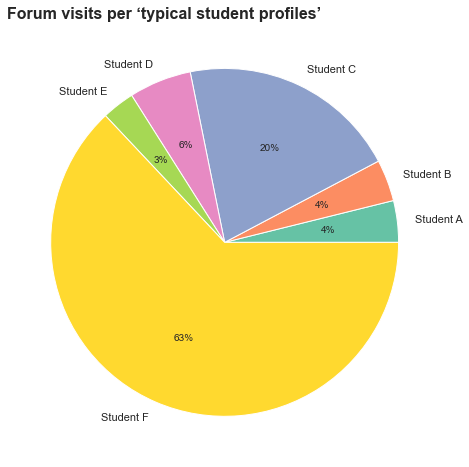

In [119]:
### Chart for Students who access the Forum most 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# create data
values_f = [14, 14, 74, 21, 11, 228]
Student_Profiles = ['Student A', 'Student B', 'Student C', 'Student D', 'Student E', 'Student F']

#define Seaborn color palette to use
colors = sns.color_palette("Set2")[0:6]

plt.title('Forum visits per ‘typical student profiles’', loc='left', fontweight='bold', fontsize=16)

#create pie chart
plt.pie(values_f, labels = Student_Profiles, colors = colors, autopct='%.0f%%')
plt.gcf().set_size_inches(15, 8)


plt.show()

Pie chart showing which student access the forum most. <br>
**Astonishing finding:** The F student spend the most time on the forum (viewing forum activities in the course)

In [76]:
### Which student did the most test

student_A_t = student_282['Name of event '].value_counts()['The test has been performed ']
student_B_t = student_310['Name of event '].value_counts()['The test has been performed ']
student_C_t = student_201['Name of event '].value_counts()['The test has been performed ']
student_D_t = student_121['Name of event '].value_counts()['The test has been performed ']
student_E_t = student_159['Name of event '].value_counts()['The test has been performed ']
student_F_t = student_207['Name of event '].value_counts()['The test has been performed ']

test_total = student_A_t, student_B_t, student_C_t, student_D_t, student_E_t, student_F_t
print("A, B, C, D, E, F: ", test_total)

A, B, C, D, E, F:  (57, 51, 45, 47, 40, 35)


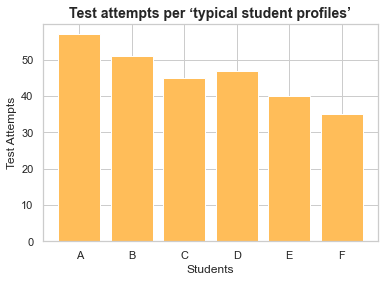

In [122]:
### Which student did the most test

test_access = [57, 51, 45, 47, 40, 35]
student_p = ('A', 'B', 'C', 'D', 'E', 'F')
y_pos = np.arange(len(student_p))

# Create bars
plt.bar(y_pos, test_access, color= '#ffbd59')

# Create names on the x-axis
plt.xticks(y_pos, student_p,)

# Add title and axis names
#plt.title('Test attempts per typical student')
plt.title('Test attempts per ‘typical student profiles’', fontweight='bold', fontsize=14)

plt.xlabel('Students')
plt.ylabel('Test Attempts')

# Show graphic
plt.show()

### To note 
(info found on https://courses.cs.ut.ee/2020/programmeerimine/fall)

To receive points for homework, homework must be submitted through Moodle before the internship, no later than 8 am on Thursday morning. 
Active participation in the internship is important for getting points for the internship. In order to receive a point for an additional task, your solution must be explained to the internship supervisor.

### Additional findings can be found in 'B1 UT STUDENT PROFILING.ipynb'